# Lab 1: Intro to PyTorch and Music Generation with RNNs
# Part 1: Intro to PyTorch

In this module, we will learn some basic computations of PyTorch.

## 1.0 Install PyTorch

In [1]:
# I have installed PyTorch through my terminal in my virtual environment
# For detailed information on how to install PyTorch, please refer to:
# https://pytorch.org/get-started/locally/

In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

## 1.1 What is PyTorch ?
- PyTorch is a machine learning library.
- It provides functions for creating and mainpulating tensors.
- Tensors - data structures which are multi-dimensional arrays. They can be described as n-dimensional arrays of base datatypes like integers, floats and strings.
- It provides ability to perform computations on tensors, define neural networks and train them.

### Shape of a tensor: 
defines number of dimensions and size of each dimension.

In [3]:
# examples of tensors
integer = torch.tensor(9923)
decimal = torch.tensor(3.14)

# printing tensors and their dimensions
print(f"`integer` is a tensor of dimension {integer.ndim}")
print(f"`decimal` is a tensor of dimension {decimal.ndim}")

`integer` is a tensor of dimension 0
`decimal` is a tensor of dimension 0


Tensors of dimension 1 can be created using lists or vectors

In [4]:
sequence = torch.tensor(range(100))
print(f"`sequence` is a tensor of dimension {sequence.ndim} and shape: {sequence.shape}")

`sequence` is a tensor of dimension 1 and shape: torch.Size([100])


Tensors of higer dimensions:

In [5]:
# 2d tensors
matrix_2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
# Assertions to check the properties of the tensors
assert isinstance(matrix_2d, torch.Tensor), "matrix_2d is not a tensor"
assert matrix_2d.ndim == 2

print(f"`matrix_2d` is a tensor of dimension {matrix_2d.ndim} and shape: {matrix_2d.shape}")

# 3d tensors
tensor_3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

assert isinstance(tensor_3d, torch.Tensor), "tensor_3d is not a tensor"
assert tensor_3d.ndim == 3
print(f"`tensor_3d` is a tensor of dimension {tensor_3d.ndim} and shape: {tensor_3d.shape}")

`matrix_2d` is a tensor of dimension 2 and shape: torch.Size([2, 3])
`tensor_3d` is a tensor of dimension 3 and shape: torch.Size([2, 2, 2])



3d tensors can be visualized as a stack of matrices or a cube of numbers<br>
These are generally used to represent images, videos, etc.

In [6]:
# define a 4d tensor
tensor_4d = torch.tensor([[[[1,2],[3,4],[5,6],[7,8]],[[1,2],[3,4],[5,6],[7,8]]],
                          [[[1,2],[3,4],[5,6],[7,8]],[[1,2],[3,4],[5,6],[7,8]]]])

assert isinstance(tensor_4d, torch.Tensor), "tensor_4d is not a tensor"
assert tensor_4d.ndim == 4, "tensor_4d is not a 4-dimensional tensor"
print(f"`tensor_4d` is a tensor of dimension {tensor_4d.ndim} and shape: {tensor_4d.shape}")

`tensor_4d` is a tensor of dimension 4 and shape: torch.Size([2, 2, 4, 2])


Use torch.zeros to initialize a 4-d Tensor of zeros with size 10 x 3 x 256 x 256.<br>
Breakdown: 10 images, RGB, 256x256

In [7]:
# initializing 4-d tensor of images
images = torch.tensor([
                    [np.zeros([256,256]),np.zeros([256,256]),np.zeros([256,256])],
                    [np.zeros([256,256]),np.zeros([256,256]),np.zeros([256,256])],
                    [np.zeros([256,256]),np.zeros([256,256]),np.zeros([256,256])],
                    [np.zeros([256,256]),np.zeros([256,256]),np.zeros([256,256])],
                    [np.zeros([256,256]),np.zeros([256,256]),np.zeros([256,256])],
                    [np.zeros([256,256]),np.zeros([256,256]),np.zeros([256,256])],
                    [np.zeros([256,256]),np.zeros([256,256]),np.zeros([256,256])],
                    [np.zeros([256,256]),np.zeros([256,256]),np.zeros([256,256])],
                    [np.zeros([256,256]),np.zeros([256,256]),np.zeros([256,256])],
                    [np.zeros([256,256]),np.zeros([256,256]),np.zeros([256,256])]
                    
                    ])

assert isinstance(images, torch.Tensor), "images is not a tensor"
assert images.ndim == 4, "images is not a 4-dimensional tensor"
assert images.shape == (10, 3, 256, 256), "images does not have the expected shape"
print(f"`images` is a {images.ndim}-d Tensor with shape: {images.shape}")

# That's probably the dumbest way to initialize a 4-d Tensor of zeros with size 10 x 3 x 256 x 256.

# A better way to do this is:
images = torch.zeros(10, 3, 256, 256)
# display(images)

assert isinstance(images, torch.Tensor), "images is not a tensor"
assert images.ndim == 4, "images is not a 4-dimensional tensor"
assert images.shape == (10, 3, 256, 256), "images does not have the expected shape"
print(f"`images` is a {images.ndim}-d Tensor with shape: {images.shape}")

`images` is a 4-d Tensor with shape: torch.Size([10, 3, 256, 256])
`images` is a 4-d Tensor with shape: torch.Size([10, 3, 256, 256])


/tmp/ipykernel_8801/442107092.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  images = torch.tensor([


Slicing can be used to access subtensors.

In [8]:
# using slicing to access subtensors from a 2d tensor
print("2d Tensor:")
display(matrix_2d)

subtensor_2d = matrix_2d[0:2, 1:3]

print("Subtensor from 2d Tensor:")
display(subtensor_2d)

print("Row Vector from 2d Tensor:")
row_vector_2d = matrix_2d[0]
display(row_vector_2d)

print("Column Vector from 2d Tensor:")
column_vector_2d = matrix_2d[:, 0]
display(column_vector_2d)

print("Scalar from 2d Tensor:")
scalar_2d = matrix_2d[0, 1]
display(scalar_2d)

2d Tensor:


tensor([[1, 2, 3],
        [4, 5, 6]])

Subtensor from 2d Tensor:


tensor([[2, 3],
        [5, 6]])

Row Vector from 2d Tensor:


tensor([1, 2, 3])

Column Vector from 2d Tensor:


tensor([1, 4])

Scalar from 2d Tensor:


tensor(2)

## 1.2 Computation on Tensors

Computation on tensors can be visualized using graphs. These graphs hold data and mathematical operations that act on the tensors in a specific order.<br>
A simple example is illustrated in the graph below:<br><br>
![alt text](tensor_computation_1.jpg)

In [9]:
# create nodes of the graph 
a = torch.tensor(20)
b = torch.tensor(32)

# perform addition operation
c1 = torch.add(a, b)
c2 = a + b # `+` operator is overloaded by PyTorch

# print(f"c1: {c1}, c2: {c2}")
print(f"c1: {c1} is a tensor ? {isinstance(c1, torch.Tensor)}")
print(f"c2: {c2} is a tensor ? {isinstance(c2, torch.Tensor)}")

c1: 52 is a tensor ? True
c2: 52 is a tensor ? True


Considering a slightly more complicated example:<br><br>
![alt text](tensor_computation_2.jpg)

In [10]:
# defining a function to perform computation as shown in the graph
def compute(a, b):
    c = torch.add(a, b)
    d = torch.subtract(b, 1)
    e = torch.multiply(c, d)
    return e

In [11]:
# use the function to perform computation
result = compute(a, b)
print(f"Computation done on a: {a} and b: {b} resulted in : {result}")
print(f"Result is a tensor ? {isinstance(result, torch.Tensor)}")

Computation done on a: 20 and b: 32 resulted in : 1612
Result is a tensor ? True


## 1.3 Neural Networks in PyTorch

We can define neural networks in PyTorch. Well that's the dominant use case of PyTorch!<br>
PyTorch uses <mark>torch.nn.Module</mark> - it serves as base class for all neural network modules in PyTorch - providing framework to build and train these neural networks.<br>

Below is a graphical representation of a simple neural network:<br><br>
![alt text](simple_neural_network.jpg)

We use <mark>torch.nn.Module</mark> to define the layers, which contain groups of perceptrons(neurons), the building blocks of neural networks.<br>
To implement a layer, we subclass <mark>torch.nn.Module</mark> and define parameters of layers (w,x,b) as attributes of this new class.<br>
It is also necessary to overload <mark>forward</mark> function by defining a forward computation function performed at every step.<br>
<br>
Writing a dense layer for the network shown above:

In [12]:
# defining a new layer

# num_inputs: number of input nodes
# num_outputs: number of output nodes
# x: input tensor

class DenseLayer(torch.nn.Module):

    # define constructor of this subclass
    def __init__(self, num_inputs, num_outputs):
        super(DenseLayer,self).__init__() # calling the constructor of parent class

        # defining the parameters of the layer and initializing them randomly
        self.W = torch.nn.Parameter(torch.randn(num_inputs, num_outputs))
        self.b = torch.nn.Parameter(torch.randn(num_outputs))

    # defining the forward computation function (override)
    def forward(self, x):
        # operation for z
        z = self.b + torch.matmul(x,self.W)

        # apply activation function
        y = torch.sigmoid(z)
        return y

Testing the output of the layer defined...

In [13]:
# define number of input and output nodes
num_inputs = 2
num_outputs = 3

# define the layer
layer = DenseLayer(num_inputs, num_outputs)
print("Done defining the layer!\n")
# define an input
x_input = torch.tensor([[1.0, 3.0]])
print(f"Input shape: {x_input.shape}")

# display(x_input.shape)

# compute using the object `layer`
y = layer(x_input)
print(f"Output shape: {y.shape[0]}")
print(f"Outputs from the layer: {y}")

Done defining the layer!

Input shape: torch.Size([1, 2])
Output shape: 1
Outputs from the layer: tensor([[0.7965, 0.9923, 0.1749]], grad_fn=<SigmoidBackward0>)


PyTorch has predefined nn.Modules (Layers) which are commonly used,like, <mark>nn.linear</mark> or <mark>nn.Sigmoid</mark>.<br>
Instead of nn.Module to define a network, we can use <mark>nn.Sequential</mark> module and a single <mark>nn.Linear</mark> layer.<br>
<b>Sequential API</b> can be used to build networks by stacking multiple layers.

In [14]:
# Using Sequential API to build a neural network

# define number of input and output nodes

# defining the model using Sequential API
model = nn.Sequential(
    nn.Linear(num_inputs,num_outputs),
    nn.Sigmoid()
)

# nn.Sequential is a submodule from nn.Module which can be used if we want to develop feed forward
# simple networks
# it eliminated the need to override the forward() method of nn.Module
print("Finished defining the layer with Sequential API...")

Finished defining the layer with Sequential API...


Testing the model with example inputs...

In [15]:
# test the model with same input as before
model_output = model(x_input)

print(f"Input Shape: {x_input.shape}")
print(f"Output Shape: {model_output.shape}")
print(f"Output from the network: {model_output}")

Input Shape: torch.Size([1, 2])
Output Shape: torch.Size([1, 3])
Output from the network: tensor([[0.1026, 0.4047, 0.3036]], grad_fn=<SigmoidBackward0>)


PyTorch `nn.Module` allows for creating more flexible networks and define new architectures.<br>
In the first network we defined (DenseLayer), we subclass `nn.Module` to create a class for our model  and define a forward pass through the network using `forward` function.<br>
This feature of subclassing allows to define custom layers, training loops, activation functions and models.<br>
Now, let us define the neural network we built in the second example (using `nn.Sequential`) by subclassing `nn.Module`

In [16]:
# Defining a network using subclassing

class LinearWithSigmoidActivation(nn.Module):
    
    # define constructor
    def __init__(self, num_inputs, num_outputs):
        super(LinearWithSigmoidActivation, self).__init__() # call constructor of parent class
        # define a single linear layer and a sigmoid activation
        self.linear = nn.Linear(num_inputs, num_outputs)
        self.activation = nn.Sigmoid()
    
    # override forward function
    def forward(self, inputs):
        linear_output = self.linear(inputs)
        output = self.activation(linear_output)
        return output

Test the network built using the same inputs as before

In [17]:
# test the builta network using same input nodes and output nodes
model1 = LinearWithSigmoidActivation(num_inputs, num_outputs)
model1_output = model1(x_input)

print(f"Model Input shape: {x_input.shape}")
print(f"Model 1 Output Shape: {model1_output.shape}")
print(f"Model 1 Output: {model1_output}")

Model Input shape: torch.Size([1, 2])
Model 1 Output Shape: torch.Size([1, 3])
Model 1 Output: tensor([[0.3991, 0.7966, 0.9467]], grad_fn=<SigmoidBackward0>)


It is evident from the above example `LinearWithSigmoidActivation` network that `nn.Module` offers wonderful flexibility to define custom models. <br>
Let us take another example:<br>
We can use boolean arguments in the `forward` function to define different network behaviours based on the state of boolean argument. An example is illustrated below:

In [18]:
# Custom behavior of network depending on state of boolean input isidentity
# when isidentity = False --> network is linear
# else --> network is identity i.e., the network outputs the inputs itself.

class CustomBehavingNetwork(nn.Module):
    # define constructor
    def __init__(self, num_inputs, num_outputs):
        super(CustomBehavingNetwork, self).__init__() # call constructor of parent class
        self.linear = nn.Linear(num_inputs, num_outputs)
        self.identity = nn.Identity()

    # Implement custom behaviour
    def forward(self, input, isidentity=False):
        if isidentity:
            output = self.identity(input)
        else:
            output = self.linear(input)
        return output

Test the behaviour of the network we built

In [19]:
model2 = CustomBehavingNetwork(num_inputs, num_outputs)

# linear behaviour
model2_output_1 = model2(x_input,  isidentity = False)
# non linear behaviour
model2_output_2 = model2(x_input, isidentity = True)

print(f"Linear output of network: {model2_output_1}")
print(f"Identity output of network: {model2_output_2}")
print(f"Is identity output equal to input ? {model2_output_2 == x_input}")

Linear output of network: tensor([[ 0.1512,  1.5483, -1.1151]], grad_fn=<AddmmBackward0>)
Identity output of network: tensor([[1., 3.]])
Is identity output equal to input ? tensor([[True, True]])


So we now know how to define networks and layers using `nn.Module` and `nn.Sequential`.<br>
We will now move to implement network training using backpropogation.

## 1.4 Training the Network Using Backpropogation

PyTorch provides `torch.autograd` for automatic differentiation (an optimized algo to calculate partial derivatives).<br>
The `.backward()` method traces operations for computing gradients.<br>
Let us compute gradient of $ y = x^2 $:

In [20]:
# Compute Gradient
x = torch.tensor(3.0, requires_grad = True)
y = x ** 2
y.backward() # compute gradient
dy_dx = x.grad
print(f"Gradient of y=x^2 at x=3.0 is: {dy_dx}")
assert dy_dx == 6

Gradient of y=x^2 at x=3.0 is: 6.0


In neural networks, we perform this differentiation on the loss/objective function to train the network so that we reach the best weights for the network.<br>
We either use Gradient descent algorithm or the Stochastic Gradient Descent(SGD) Algorithm to perform differentiation on the objective function.<br>
In the below example, we will write code to minimize $ L = (x - x_f)^2$, the loss of some neural network which is to be trained.<br>
Hence, training a neural network --> minimizing the loss of cost function --> performing partial differentiation.

Initialized x to tensor([1.4682])


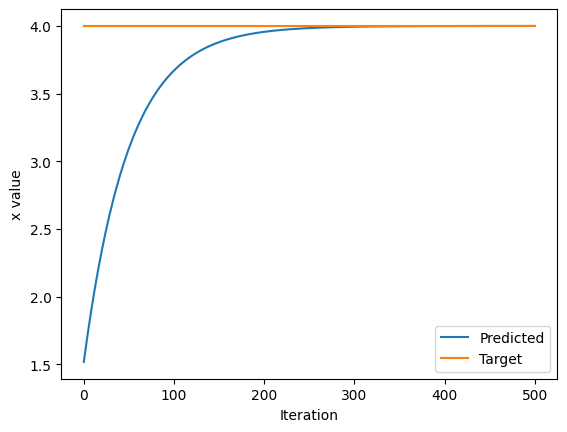

In [21]:
# Minimising the loss function
x = torch.randn(1) # randomly initialize the starting point
print(f"Initialized x to {x}")

lr = 1e-2 # define learning rate
history = []
x_f = 4 # target value

# implement the gradient descent algo
n_iterations = 500 # number of iterations for the GD algorithm

for i in range(n_iterations):
    x = torch.tensor([x], requires_grad = True)

    # compute loss
    loss = (x - x_f) ** 2

    # backpropogate
    loss.backward()

    # update x

    x = x.item() - (lr*x.grad)

    # append into `history` to plot
    history.append(x.item())

# plot
plt.plot(history,label = 'Predicted')
plt.plot([0,500], [x_f,x_f], label = 'Target')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()